In [1]:
#Import the dependencies
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

FLT_EPSILON = 1e-4



In [2]:
# Load Data 
df = pd.read_csv('datasets/ex1data2.csv')
X = np.array((df['Size'].to_numpy(), df['Bedrooms'].to_numpy()))
y = np.array(df['Price'])
number_of_samples = len(y)
print(df)

Size  Bedrooms   Price
0   2104         3  399900
1   1600         3  329900
2   2400         3  369000
3   1416         2  232000
4   3000         4  539900
5   1985         4  299900
6   1534         3  314900
7   1427         3  198999
8   1380         3  212000
9   1494         3  242500
10  1940         4  239999
11  2000         3  347000
12  1890         3  329999
13  4478         5  699900
14  1268         3  259900
15  2300         4  449900
16  1320         2  299900
17  1236         3  199900
18  2609         4  499998
19  3031         4  599000
20  1767         3  252900
21  1888         2  255000
22  1604         3  242900
23  1962         4  259900
24  3890         3  573900
25  1100         3  249900
26  1458         3  464500
27  2526         3  469000
28  2200         3  475000
29  2637         3  299900
30  1839         2  349900
31  1000         1  169900
32  2040         4  314900
33  3137         3  579900
34  1811         4  285900
35  1437         3  249900
36  1

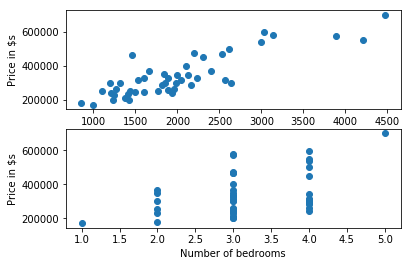

In [4]:
# Plot features with output 
plt.figure(1)
plt.subplot(2,1,1)
plt.scatter(df['Size'], df['Price'])
plt.xlabel('Size of house (ft2)')
plt.ylabel('Price in $s')

plt.subplot(2,1,2)
plt.scatter(df['Bedrooms'], df['Price'])
plt.xlabel('Number of bedrooms')
plt.ylabel('Price in $s')
plt.show()

In [15]:
def normalized_features_matrix(X : np.ndarray) -> np.ndarray:
    '''

    :param X:  np.array with  m x N dimensions , m : number of features, N:number of training samples
    :return: normalized feature Matrix
    '''
    number_of_features = len(X)
    mu = np.zeros((number_of_features, 1))
    sigma = np.zeros((number_of_features, 1))

    mu = X.mean(axis = 1)
    sigma = X.std(axis = 1, ddof=1) # Ddof takes care of division by N-1 and not N to compensate for bias in sample variance

    X = (X.transpose() - mu)/sigma
    X = X.transpose()

    return X, mu, sigma

def compute_multivariate_cost_function(X : np.ndarray  , theta : np.ndarray, y:np.ndarray) -> float:

    ''' X : np.array with  M x N dimensions
        theta : np.array with M x 1 dimensions
        y : np.array with  1 x N dimensions
    '''


    J_theta = (theta.transpose().dot(X) - y).dot((theta.transpose().dot(X) - y).transpose())/(2*len(y))
    return J_theta



def gradient_descent_multivariate(X : np.ndarray  , theta : np.ndarray, y:np.ndarray, number_of_iterations :int, alpha:float) -> tuple:
    '''

    :param X: np.array with  M x N dimensions
    :param theta: np.array with M x 1 dimensions
    :param y: data vector with np.array with  1 x N dimensions
    :param number_of_iterations:
    :param alpha: learning rate
    :return:
    '''
    temp = np.zeros_like(theta)

    for n in range(number_of_iterations):

        temp = theta - alpha * X.dot((theta.transpose().dot(X) - y).transpose())/len(y)
        theta = temp
        J = compute_multivariate_cost_function(X, theta, y)
    return theta, J

def parameters_from_normal_equation(X :np.ndarray, y:np.ndarray):
    '''

    :param X: M x N feature matrix
    :param y: 1 x N data vector
    :return:
    '''
    X = X.transpose()
    theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

    return theta




In [7]:
#NORMALIZE FEATURES 
X, mu, sigma = normalized_features_matrix(X)
print(X)

[[ 1.30009869e-01 -5.04189838e-01  5.02476364e-01 -7.35723065e-01
   1.25747602e+00 -1.97317285e-02 -5.87239800e-01 -7.21881404e-01
  -7.81023044e-01 -6.37573110e-01 -7.63567023e-02 -8.56737193e-04
  -1.39273340e-01  3.11729182e+00 -9.21956312e-01  3.76643089e-01
  -8.56523009e-01 -9.62222960e-01  7.65467909e-01  1.29648433e+00
  -2.94048269e-01 -1.41790005e-01 -4.99156507e-01 -4.86733818e-02
   2.37739217e+00 -1.13335621e+00 -6.82873089e-01  6.61026291e-01
   2.50809813e-01  8.00701226e-01 -2.03448310e-01 -1.25918949e+00
   4.94765729e-02  1.42986760e+00 -2.38681627e-01 -7.09298077e-01
  -9.58447962e-01  1.65243186e-01  2.78635031e+00  2.02993169e-01
  -4.23656542e-01  2.98626458e-01  7.12617934e-01 -1.00752294e+00
  -1.44542274e+00 -1.87089985e-01 -1.00374794e+00]
 [-2.23675187e-01 -2.23675187e-01 -2.23675187e-01 -1.53776691e+00
   1.09041654e+00  1.09041654e+00 -2.23675187e-01 -2.23675187e-01
  -2.23675187e-01 -2.23675187e-01  1.09041654e+00 -2.23675187e-01
  -2.23675187e-01  2.4045

In [9]:
#ADD THE ROW FOR 1s FOR THETA_0
ones = np.ones((1, number_of_samples))
X = np.vstack((ones, X))

In [12]:
#GET THETA FROM MULTIVARIATE GRADIENT DESCENT 
theta = np.zeros((np.size(X, 0), 1))
theta, J = gradient_descent_multivariate(X, theta, y, number_of_iterations=400, alpha = 0.1)
print(f'Theta : {theta}')

Theta : [[340412.65957447]
 [110631.04895815]
 [ -6649.47295013]]


In [18]:
#PRICE PREDICTION FOR A 1650 ft2 3 BEDROOM HOUSE
# DO SCALE THE FEATURES BEFORE MAKING A PREDICTION
price_gradient_descent = theta[0] + theta[1]*(1650-mu[0])/sigma[0] + theta[2]*(3 - mu[1])/sigma[1]
print(f'Price for a 1650 sq ft house with 3 bedrooms is {price_gradient_descent}')

#PRICE PREDICTION FOR A 1650 ft2 3 BEDROOM HOUSE USING NORMAL EQUATIONS
X = np.array((df['Size'].to_numpy(), df['Bedrooms'].to_numpy()))
y = np.array(df['Price'])
ones = np.ones((1, number_of_samples))
X = np.vstack((ones, X))


theta_normal_equations = parameters_from_normal_equation(X, y)
print(f'Theta from Normal Equations : {theta_normal_equations}')
price_normal_equations = theta_normal_equations * np.array((1, 1650, 3))
print(f'Price for a 1650 sq ft house with 3 bedrooms calculated from normal equations is {price_normal_equations}')


Price for a 1650 sq ft house with 3 bedrooms is [293081.46462228]
Theta from Normal Equations : [89597.9095428    139.21067402 -8738.01911233]
Price for a 1650 sq ft house with 3 bedrooms calculated from normal equations is [ 89597.9095428  229697.61212908 -26214.05733698]
